In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Real estate.csv")
df.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [52]:
df.isnull().sum()

no                                          0
x1_transaction_date                       414
x2_house_age                                0
x3_distance_to_the_nearest_mrt_station      0
x4_number_of_convenience_stores             0
x5_latitude                                 0
x6_longitude                                0
y_house_price_of_unit_area                  0
dtype: int64

In [6]:
cols=list(df.columns)
cols

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [7]:
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.lower()

In [8]:
cols=list(df.columns)
cols

['no',
 'x1_transaction_date',
 'x2_house_age',
 'x3_distance_to_the_nearest_mrt_station',
 'x4_number_of_convenience_stores',
 'x5_latitude',
 'x6_longitude',
 'y_house_price_of_unit_area']

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


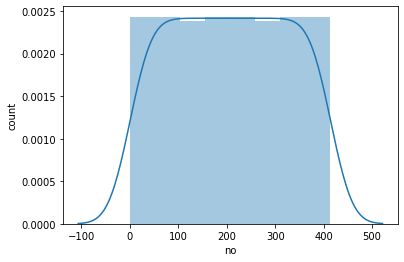

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


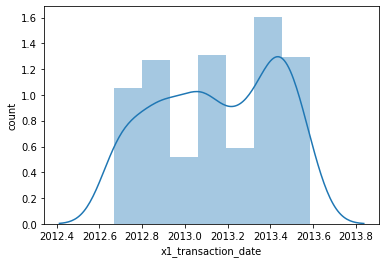

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


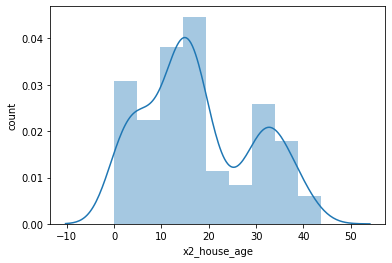

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


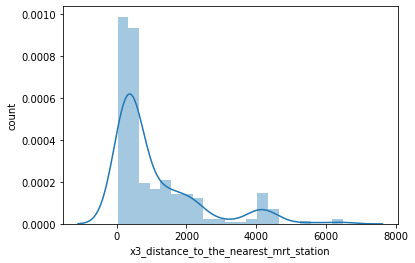

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


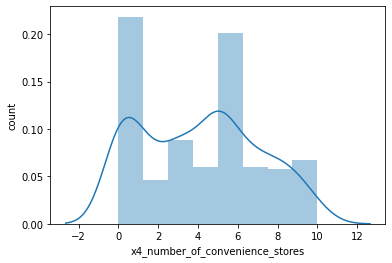

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


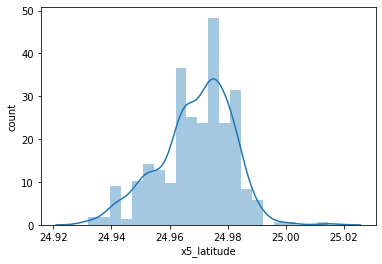

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


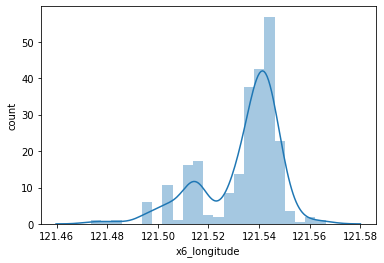

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


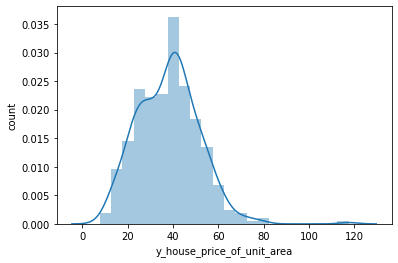

In [9]:
for x in cols:
    sns.distplot(df[x])
    plt.xlabel(x)
    plt.ylabel("count")
    plt.show()

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


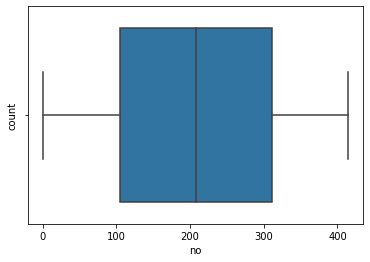

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


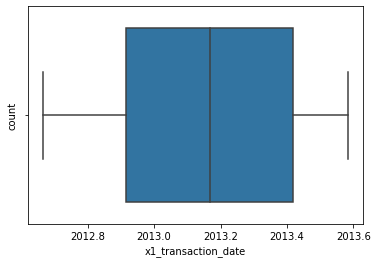

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


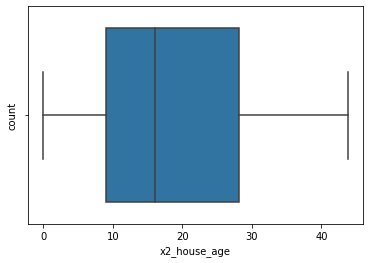

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


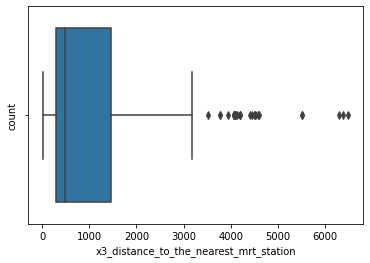

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


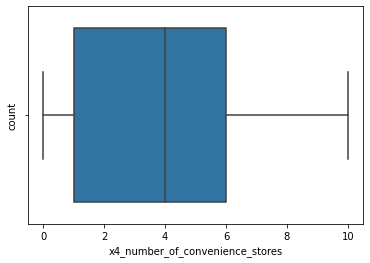

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


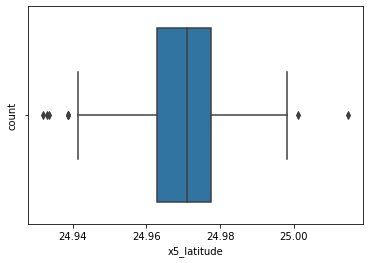

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


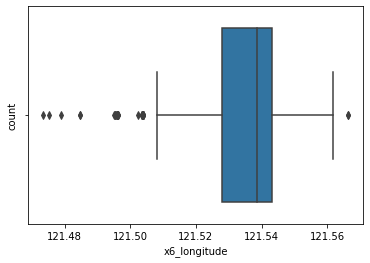

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


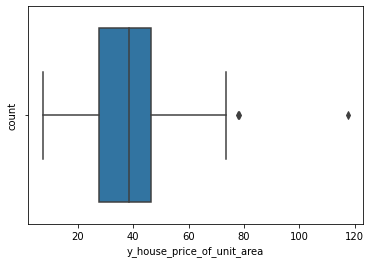

In [10]:
for x in cols:
    sns.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel("count")
    plt.show()

In [11]:
cols

['no',
 'x1_transaction_date',
 'x2_house_age',
 'x3_distance_to_the_nearest_mrt_station',
 'x4_number_of_convenience_stores',
 'x5_latitude',
 'x6_longitude',
 'y_house_price_of_unit_area']

In [12]:
df.rename(columns={'no':'No'})

,No,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [13]:
df.columns

Index(['no', 'x1_transaction_date', 'x2_house_age',
       'x3_distance_to_the_nearest_mrt_station',
       'x4_number_of_convenience_stores', 'x5_latitude', 'x6_longitude',
       'y_house_price_of_unit_area'],
      dtype='object')

In [14]:
df.dtypes

no                                          int64
x1_transaction_date                       float64
x2_house_age                              float64
x3_distance_to_the_nearest_mrt_station    float64
x4_number_of_convenience_stores             int64
x5_latitude                               float64
x6_longitude                              float64
y_house_price_of_unit_area                float64
dtype: object

In [15]:
df.head(3)

,no,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [16]:
df['x1_transaction_date']=pd.to_datetime(df['x1_transaction_date'],format='%Y%m%d',errors='coerce')

In [17]:
df1=df.drop(columns=['x1_transaction_date','x5_latitude','x6_longitude'])

In [18]:
df1.head()

,no,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,y_house_price_of_unit_area
0,1,32.0,84.87882,10,37.9
1,2,19.5,306.59470,9,42.2
2,3,13.3,561.98450,5,47.3
3,4,13.3,561.98450,5,54.8
4,5,5.0,390.56840,5,43.1


In [19]:
df1.corr()

,no,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,y_house_price_of_unit_area
no,1.000000,-0.032808,-0.013573,-0.012699,-0.028587
x2_house_age,-0.032808,1.000000,0.025622,0.049593,-0.210567
x3_distance_to_the_nearest_mrt_station,-0.013573,0.025622,1.000000,-0.602519,-0.673613
x4_number_of_convenience_stores,-0.012699,0.049593,-0.602519,1.000000,0.571005
y_house_price_of_unit_area,-0.028587,-0.210567,-0.673613,0.571005,1.000000


<AxesSubplot:>

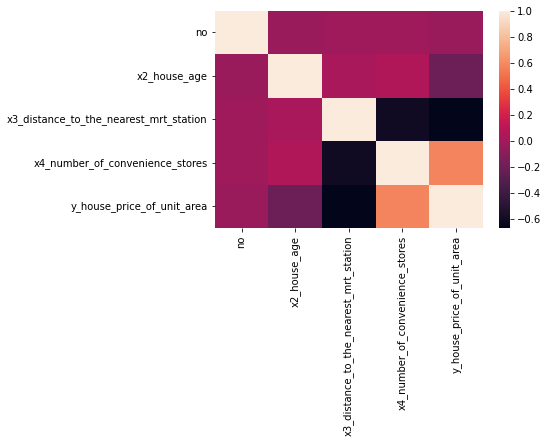

In [20]:
sns.heatmap(df1.corr())

In [21]:
# n_cols=cols
# n_cols.remove('No')
# ncols
cols

['no',
 'x1_transaction_date',
 'x2_house_age',
 'x3_distance_to_the_nearest_mrt_station',
 'x4_number_of_convenience_stores',
 'x5_latitude',
 'x6_longitude',
 'y_house_price_of_unit_area']

In [22]:
# find IQRS
# for col in cols:
#     q1=df[col].percentile(0.10)
#     q1

In [23]:
df.head()

,no,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,NaT,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,NaT,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,NaT,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,NaT,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,NaT,5.0,390.56840,5,24.97937,121.54245,43.1


In [24]:
# Deviring depedendt variables and target variabeles
x=df.iloc[0:,2:5]
x

,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5
...,...,...,...
409,13.7,4082.01500,0
410,5.6,90.45606,9
411,18.8,390.96960,7
412,8.1,104.81010,5


In [45]:
pip install --upgrade pandas
# # x=df[df.qunatile()]
# Q1 = x.quantile(0.25)
# Q3 = x.quantile(0.75)
# IQR = Q3 - Q1
# xyt=x[(x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))]
# xyt

SyntaxError: invalid syntax (1383129701.py, line 1)

In [26]:
y=df.iloc[:,-1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: y_house_price_of_unit_area, Length: 414, dtype: float64

In [27]:
# x1=np.array(x).reshape(-1,1)

In [28]:
# y1=np.array(x).reshape(-1,1)
x1=x
y1=y

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=42,train_size=.80)

In [30]:
from sklearn.preprocessing import StandardScaler
#scaling the data 
sc = StandardScaler()
#model 1
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# x_test

In [31]:
linereg=LinearRegression()
linereg.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=linereg.predict(x_test)
y_pred

array([49.65029483, 43.63418374, 43.25559711, 40.54504643, 30.02253185,
       42.76115343, 44.05213889, 43.97461726, 28.96883548, 52.53812809,
       32.01140143, 34.41627326, 34.42500748, 28.94187375, 34.10533955,
       32.76928696, 42.76994007, 51.05718419, 31.5997044 , 46.23694741,
        1.60852866, 32.82691283, 46.2087237 , 45.73026011, 16.94793687,
       40.44963146, 16.92441071, 43.25559711, 38.26129413, 35.62242747,
       11.97136777, 37.36257399, 40.39127489, 32.33166396, 44.95567886,
       31.0769121 , 52.71901189, 17.53040182, 45.71069998, 41.24947341,
       33.5998047 , 40.04322085, 47.25263832, 37.83946884, 43.68586483,
       48.15307671, 46.43656126, 25.49063651, 51.73010247, 47.00674875,
       49.65029483, 46.65904428, 39.74781606, 42.97368549, 36.85688572,
       17.50456128, 37.56697735, 34.42301364, 29.94501022, 43.97461726,
       33.33396251, 30.25747554, 17.50456128, 12.10015575,  4.59259481,
       32.85275337, 33.48515031, 46.58254024, 33.10098841, 34.18

In [33]:
y_pred.ndim

1

In [34]:
# Draw scatter plot
# plt.scatter(x1,y1,color="green")
# plt.plot(x1,y_pred,color="blue")
# plt.xlabel("x-points")
# plt.ylabel("y-points")
# plt.show()

In [35]:
# plotting training set
# plt.scatter(x_train,y_train,color="blue")
# plt.plot(x_train,linereg.predict(x_train),color="green")
# plt.legend()
# plt.title('(Training set)')
# plt.xlabel("x-points")
# plt.ylabel("y-poiunt")
# plt.show()

In [36]:
# plotiing testing set
# plt.scatter(x_test,y_test,color="blue")
# plt.plot(x_test,linereg.predict(x_test),color="red")
# plt.title("Testing Set")
# plt.xlabel("X")
# plt.ylabel("y")
# plt.show()

In [37]:
print("slope",linereg.coef_)
print("intercept",linereg.intercept_)

slope [-2.92260609 -6.68647277  3.67870965]
intercept 38.39154078549849


In [38]:
linereg.score(x1,y1)

C:\Users\Y520\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-671767.7450690522

In [39]:
# finding r2 scores
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.6489726933106555

In [40]:
# adj_r2=1-(1-r2)*len(y_train)/(len(y_train)
adj_r2 = 1 - (1 - r2 )*len(y_train)/(len(y_train)-x_train.shape[1]-1)
adj_r2

0.6446787813022232

In [41]:
from sklearn.metrics import *
#rmse for model 1 - Train and test 
rmse_on_test = mean_squared_error(y_test, y_pred, squared=False)
rmse_on_test

7.673868078735506

In [42]:
# Error in prediction preparing datset
error_pred=pd.DataFrame(columns={'Actual_data','Predicted_data'})
error_pred['Actual_data']=y_test
error_pred['Predicted_data']=y_pred
error_pred['Error']=error_pred['Actual_data']-error_pred['Predicted_data']
error_pred.head()

,Predicted_data,Actual_data,Error
358,49.650295,45.1,-4.550295
350,43.634184,42.3,-1.334184
373,43.255597,52.2,8.944403
399,40.545046,37.3,-3.245046
369,30.022532,22.8,-7.222532


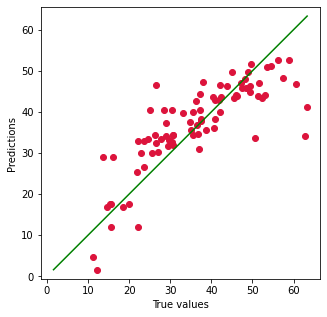

In [43]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred['Actual_data'],error_pred['Predicted_data'],c='crimson')
p1=max(max(error_pred['Predicted_data']),max(error_pred['Actual_data']))
p2=min(min(error_pred['Predicted_data']),min(error_pred['Actual_data']))
plt.plot([p1,p2],[p1,p2],'-g')
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.axis("Equal")
plt.show()